## Finding insides from AirBnB in Berlin

In this project I used the [Cross Industry Process](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining) for Data Mining on the [Berlin AirBnB dataset](http://insideairbnb.com/get-the-data.html). I hope this project will give you some valuable insides for Berlin.

The CRISP-DM process can be broken down into several steps which help understanding the problem

- Business Understanding
- Data Understanding
- Prepare Data
- Data Modeling
- Evaluate the Results
- Deploy


In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from support import *

plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 5)  # Размер картинок



## Business Understanding

AirBNB is a community based platform in which users can offer their private accommodations to other people. So the platform acts as a kind of broker. Users can earn money by renting their couch, their room, their flats or even a complete houses.

I will be working with Berlin data. Because I live here and I know some of the neighborhoods here. I would like to find answers on such questions:

    1. Which neighbourhood yields the highest returns?
    2. Is there a relation between amenities and pricies? 
    3. Can be price predicted?




In [ ]:
## Data Understanding

To answer the questions curated below it is necessary to obtain some sort of Data understanding. This includes a general overview of what kind of information is available within the dataset. But also where there might be potential shortcomings, such as missing data. 

We are going to work with such datasets:

- listings.csv consists of details of all the listings in Berlin including their price, accomodates, ratings, number of reviews, summary, name, owner name, Description, host Id and many other columns decribing details of listings.

- calendar.csv consists of details of listings and its availability and its price.


In [2]:
# Reat the data
listings = pd.read_csv('data/listings.csv.gz', low_memory=False, compression="gzip")
# calendar = pd.read_csv('./calendar.csv')

### Determine the number of rows (entries for specifc accommodations) and columns (different features of the accommodations)

In [9]:
# Checking the shape of the listings dataset
num_rows = listings.shape[0] #Contains the number of rows in the dataset
num_cols = listings.shape[1] #Contains the number of columns in the dataset

print('The dataset contains', num_rows, 'rows and', num_cols, 'columns.')

The dataset contains 24586 rows and 106 columns.


In [ ]:
# Show all cols in the head
pd.options.display.max_columns = listings.shape[1]
listings.describe()

In [3]:
# Data owerview 
col_check(listings)

0    1944
1    3176
2    3309
3    6883
4    7071
Name: id, dtype: int64
Missing (%): 0.0
----------
0    https://www.airbnb.com/rooms/1944
1    https://www.airbnb.com/rooms/3176
2    https://www.airbnb.com/rooms/3309
3    https://www.airbnb.com/rooms/6883
4    https://www.airbnb.com/rooms/7071
Name: listing_url, dtype: object
Missing (%): 0.0
----------
0    20191112224519
1    20191112224519
2    20191112224519
3    20191112224519
4    20191112224519
Name: scrape_id, dtype: int64
Missing (%): 0.0
----------
0    2019-11-14
1    2019-11-14
2    2019-11-14
3    2019-11-14
4    2019-11-14
Name: last_scraped, dtype: object
Missing (%): 0.0
----------
0                               cafeheaven Pberg/Mitte
1                      Fabulous Flat in great Location
2                    BerlinSpot Schöneberg near KaDeWe
3    Stylish East Side Loft in Center with AC & 2 b...
4                     BrightRoom with sunny greenview!
Name: name, dtype: object
Missing (%): 0.0020743512568128205
-------

In [ ]:
# Present cols with missed values
#listings.isnull().mean()

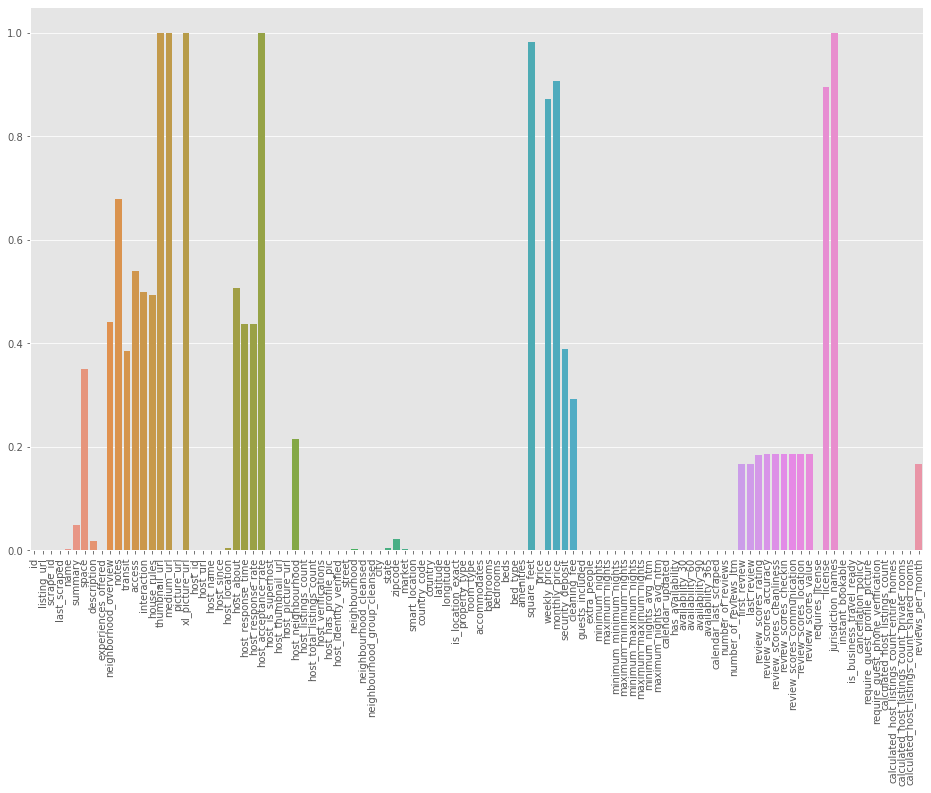

In [5]:
# Check the missing values
show_missing(listings)

In [11]:
#Provide a set of column name that have no values and must be dropped
listings.columns[listings.isnull().mean() == 1]

Index(['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate',
       'jurisdiction_names'],
      dtype='object')

In [ ]:
#Provide a set of column name that have some missing values
listings.columns[listings.isnull().mean() > 0]

In [14]:
#Provide a set of column name without missing values
listings.columns[listings.isnull().mean() == 0]

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'experiences_offered',
       'picture_url', 'host_id', 'host_url', 'host_verifications', 'street',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bed_type', 'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'requires_license', 'instant_bookable',
       'is_business_travel_ready', 'cancellation_policy',
       'require_guest_pr

In [13]:
# Check the data structure
listings.dtypes.value_counts()

object     62
float64    23
int64      21
dtype: int64

In [12]:
# list of all colums
listings.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


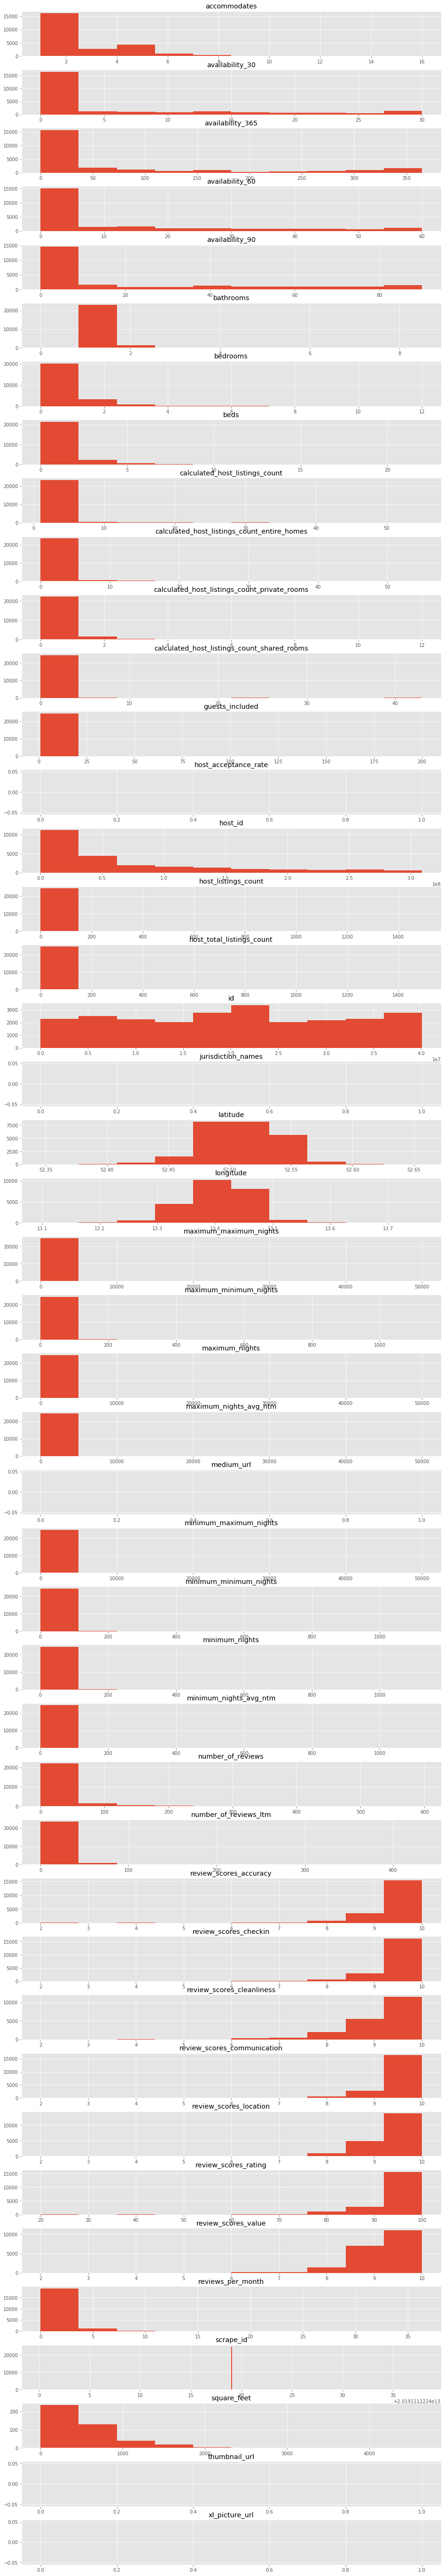

In [6]:
listings.hist(figsize=(16,100),layout=(44,1));

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(listings.corr(), annot=True, fmt='.1f')

## Prepare Data

decide on the data that we are going to use for our analysis. 

In [65]:
# Define a subset of the original Listing dataset
ss = listings[['id','price', 'property_type', 'bedrooms', 'minimum_nights',
               'number_of_reviews', 'reviews_per_month','review_scores_value', 'review_scores_rating', 'availability_365', 'availability_90', 'availability_60', 'availability_30']]

#To simplify let's use only appartments
ss = ss[ss['property_type']=='Apartment']

# After filtering out only the apartments let's drop property_type
ss = ss.drop(columns=['property_type'])

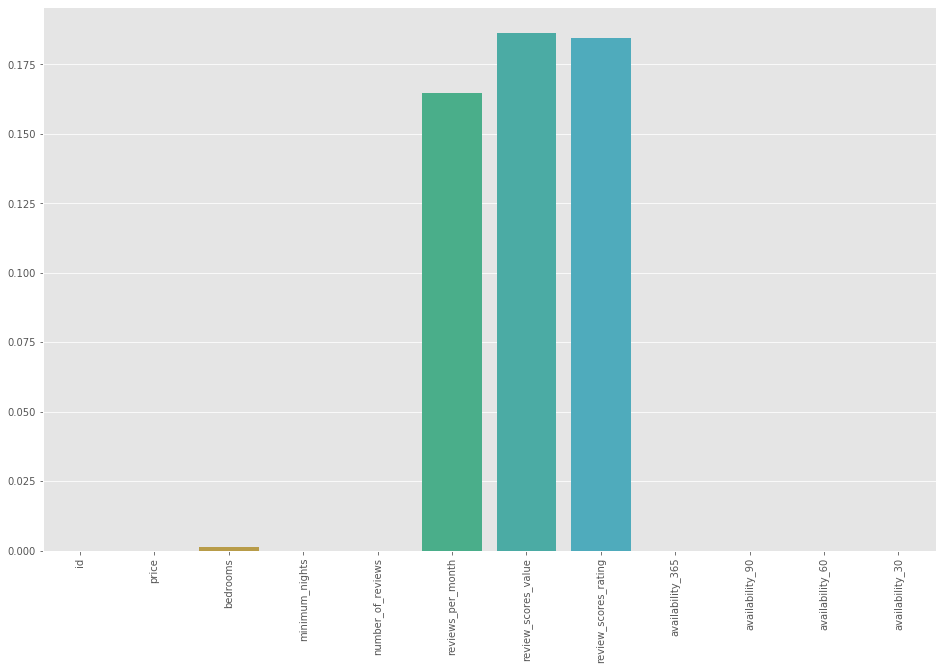

In [66]:
show_missing(ss)

In [67]:
#Drop missing values
ss.dropna(axis=0)

id    price  bedrooms  minimum_nights  number_of_reviews  \
0          1944   $21.00       1.0              60                 18   
1          3176   $90.00       1.0              62                145   
2          3309   $28.00       1.0               7                 27   
4          7071   $33.00       1.0               3                266   
5          9991  $180.00       4.0               6                  7   
...         ...      ...       ...             ...                ...   
24394  39868831   $70.00       0.0               1                  1   
24399  39879765   $50.00       2.0               2                  1   
24404  39883210   $40.00       1.0               1                  2   
24456  39942426   $20.00       1.0               1                  1   
24459  39947024   $25.00       1.0               1                  2   

       reviews_per_month  review_scores_value  review_scores_rating  \
0                   0.24                  8.0                  82.0   
1                   1.14                  9.0                  93.0   
2                   0.35                  9.0                  89.0   
4                   2.13                 10.0                  96.0   
5                   0.13                 10.0                 100.0   
...                  ...                  ...                   ...   
24394               1.00                 10.0                 100.0   
24399               1.00                 10.0                 100.0   
24404               2.00                  8.0                 100.0   
24456               1.00                 10.0                 100.0   
24459               2.00                 10.0                  60.0   

       availability_365  availability_90  availability_60  availability_30  
0                   251               25               25                9  
1                   344               69               39                9  
2                   317               42               12                0  
4                    30               30               30               21  
5                    45                8                1                0  
...                 ...              ...              ...              ...  
24394                87               87               57               30  
24399                70               70               40               15  
24404               358               83               53               24  
24456                53               53               27               14  
24459                 0                0                0                0  

[17759 rows x 12 columns]

In [68]:
# Clearing the price

# ss = ss.replace({'price': r'\$(\d{,3})\,?(\d{,3})\.*(\d{,3})'}, {'price': r'\1\2'}, regex=True)
# ss.price = ss['price'].astype(int)

ss['price'] = ss['price'].str.replace(',', '')
ss['price'] = ss['price'].str.replace('$', '')
ss['price'] = ss['price'].astype(float)
ss['price'].describe()


count    21849.000000
mean        61.782461
std         91.428355
min          0.000000
25%         33.000000
50%         49.000000
75%         75.000000
max       9000.000000
Name: price, dtype: float64

In [13]:
#Values destributon
ss.price.value_counts(normalize = True, bins = 20)

(-9.001, 450.0]     0.997757
(450.0, 900.0]      0.001693
(900.0, 1350.0]     0.000320
(4950.0, 5400.0]    0.000046
(1350.0, 1800.0]    0.000046
(1800.0, 2250.0]    0.000046
(8550.0, 9000.0]    0.000046
(4050.0, 4500.0]    0.000046
(5400.0, 5850.0]    0.000000
(5850.0, 6300.0]    0.000000
(4500.0, 4950.0]    0.000000
(8100.0, 8550.0]    0.000000
(3600.0, 4050.0]    0.000000
(3150.0, 3600.0]    0.000000
(2700.0, 3150.0]    0.000000
(2250.0, 2700.0]    0.000000
(6300.0, 6750.0]    0.000000
(6750.0, 7200.0]    0.000000
(7200.0, 7650.0]    0.000000
(7650.0, 8100.0]    0.000000
Name: price, dtype: float64

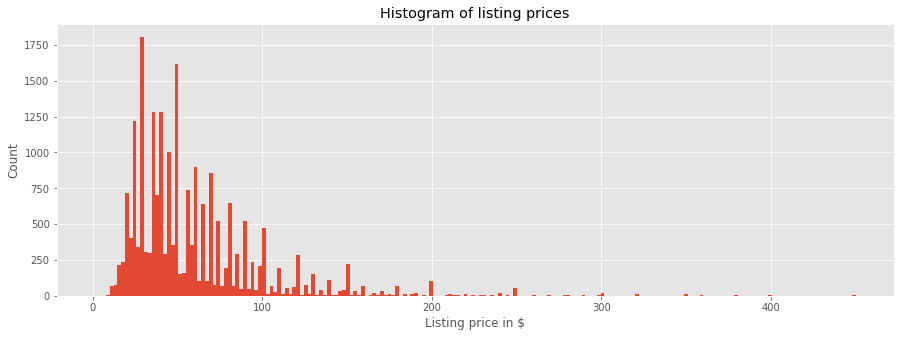

In [69]:
ss.loc[(ss.price <= 450) & (ss.price > 0)].price.hist(bins=200)
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices');


In [70]:
# Remowe all prices higher then 450
ss = ss[ss['price'] <= 450]

In [71]:
ss.head()

id  price  bedrooms  minimum_nights  number_of_reviews  \
0  1944   21.0       1.0              60                 18   
1  3176   90.0       1.0              62                145   
2  3309   28.0       1.0               7                 27   
4  7071   33.0       1.0               3                266   
5  9991  180.0       4.0               6                  7   

   reviews_per_month  review_scores_value  review_scores_rating  \
0               0.24                  8.0                  82.0   
1               1.14                  9.0                  93.0   
2               0.35                  9.0                  89.0   
4               2.13                 10.0                  96.0   
5               0.13                 10.0                 100.0   

   availability_365  availability_90  availability_60  availability_30  
0               251               25               25                9  
1               344               69               39                9  
2               317               42               12                0  
4                30               30               30               21  
5                45                8                1                0

In [ ]:
# pd.options.display.max_columns = listings.shape[1]
# listings[listings['id'] == 22673624]#[['id','price']]

In [72]:
# Add boolean values
boolean_feature = ['host_identity_verified', 'instant_bookable', 'host_is_superhost']
for i in boolean_feature:
    ss[i] = listings[i].map({'t': True, 'f': False})
ss.head()

id  price  bedrooms  minimum_nights  number_of_reviews  \
0  1944   21.0       1.0              60                 18   
1  3176   90.0       1.0              62                145   
2  3309   28.0       1.0               7                 27   
4  7071   33.0       1.0               3                266   
5  9991  180.0       4.0               6                  7   

   reviews_per_month  review_scores_value  review_scores_rating  \
0               0.24                  8.0                  82.0   
1               1.14                  9.0                  93.0   
2               0.35                  9.0                  89.0   
4               2.13                 10.0                  96.0   
5               0.13                 10.0                 100.0   

   availability_365  availability_90  availability_60  availability_30  \
0               251               25               25                9   
1               344               69               39                9   
2               317               42               12                0   
4                30               30               30               21   
5                45                8                1                0   

  host_identity_verified  instant_bookable host_is_superhost  
0                   True             False             False  
1                   True             False             False  
2                  False             False             False  
4                   True             False              True  
5                   True             False             False

In [73]:
# Cancelation policy cleaning
ss = pd.concat([ss, pd.get_dummies(listings['cancellation_policy'])],axis=1)
ss.head()

id  price  bedrooms  minimum_nights  number_of_reviews  \
0  1944.0   21.0       1.0            60.0               18.0   
1  3176.0   90.0       1.0            62.0              145.0   
2  3309.0   28.0       1.0             7.0               27.0   
3     NaN    NaN       NaN             NaN                NaN   
4  7071.0   33.0       1.0             3.0              266.0   

   reviews_per_month  review_scores_value  review_scores_rating  \
0               0.24                  8.0                  82.0   
1               1.14                  9.0                  93.0   
2               0.35                  9.0                  89.0   
3                NaN                  NaN                   NaN   
4               2.13                 10.0                  96.0   

   availability_365  availability_90  ...  availability_30  \
0             251.0             25.0  ...              9.0   
1             344.0             69.0  ...              9.0   
2             317.0             42.0  ...              0.0   
3               NaN              NaN  ...              NaN   
4              30.0             30.0  ...             21.0   

   host_identity_verified instant_bookable host_is_superhost flexible  \
0                    True            False             False        0   
1                    True            False             False        0   
2                   False            False             False        0   
3                     NaN              NaN               NaN        0   
4                    True            False              True        0   

   moderate  strict  strict_14_with_grace_period  super_strict_30  \
0         1       0                            0                0   
1         0       0                            1                0   
2         0       0                            1                0   
3         1       0                            0                0   
4         1       0                            0                0   

   super_strict_60  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 21 columns]

In [74]:
# Room type preparation
ss = pd.concat([ss, pd.get_dummies(listings['room_type'])],axis=1)
ss.head()

id  price  bedrooms  minimum_nights  number_of_reviews  \
0  1944.0   21.0       1.0            60.0               18.0   
1  3176.0   90.0       1.0            62.0              145.0   
2  3309.0   28.0       1.0             7.0               27.0   
3     NaN    NaN       NaN             NaN                NaN   
4  7071.0   33.0       1.0             3.0              266.0   

   reviews_per_month  review_scores_value  review_scores_rating  \
0               0.24                  8.0                  82.0   
1               1.14                  9.0                  93.0   
2               0.35                  9.0                  89.0   
3                NaN                  NaN                   NaN   
4               2.13                 10.0                  96.0   

   availability_365  availability_90  ...  flexible  moderate strict  \
0             251.0             25.0  ...         0         1      0   
1             344.0             69.0  ...         0         0      0   
2             317.0             42.0  ...         0         0      0   
3               NaN              NaN  ...         0         1      0   
4              30.0             30.0  ...         0         1      0   

  strict_14_with_grace_period super_strict_30  super_strict_60  \
0                           0               0                0   
1                           1               0                0   
2                           1               0                0   
3                           0               0                0   
4                           0               0                0   

   Entire home/apt  Hotel room  Private room  Shared room  
0                0           0             1            0  
1                1           0             0            0  
2                0           0             1            0  
3                1           0             0            0  
4                0           0             1            0  

[5 rows x 25 columns]

In [75]:
# Neigbohurs
ss = pd.concat([ss, pd.get_dummies(listings['neighbourhood_group_cleansed'])],axis=1)
ss.head()

id  price  bedrooms  minimum_nights  number_of_reviews  \
0  1944.0   21.0       1.0            60.0               18.0   
1  3176.0   90.0       1.0            62.0              145.0   
2  3309.0   28.0       1.0             7.0               27.0   
3     NaN    NaN       NaN             NaN                NaN   
4  7071.0   33.0       1.0             3.0              266.0   

   reviews_per_month  review_scores_value  review_scores_rating  \
0               0.24                  8.0                  82.0   
1               1.14                  9.0                  93.0   
2               0.35                  9.0                  89.0   
3                NaN                  NaN                   NaN   
4               2.13                 10.0                  96.0   

   availability_365  availability_90  ...  Lichtenberg  Marzahn - Hellersdorf  \
0             251.0             25.0  ...            0                      0   
1             344.0             69.0  ...            0                      0   
2             317.0             42.0  ...            0                      0   
3               NaN              NaN  ...            0                      0   
4              30.0             30.0  ...            0                      0   

  Mitte Neukölln Pankow  Reinickendorf  Spandau  Steglitz - Zehlendorf  \
0     1        0      0              0        0                      0   
1     0        0      1              0        0                      0   
2     0        0      0              0        0                      0   
3     0        0      0              0        0                      0   
4     0        0      1              0        0                      0   

   Tempelhof - Schöneberg  Treptow - Köpenick  
0                       0                   0  
1                       0                   0  
2                       1                   0  
3                       0                   0  
4                       0                   0  

[5 rows x 37 columns]

In [76]:
ss.shape

(24586, 37)

In [77]:
#amenities
tempdf = listings.copy()

tempdf['amenities'] = tempdf['amenities'].map(lambda x: x.replace('"','').replace('{','').replace('}','').split(','))
unique_amenities = np.unique(np.concatenate(tempdf['amenities'].values))
amenities_array = np.array([tempdf['amenities'].map(lambda x: i in x) for i in unique_amenities])
amenities_array_t = amenities_array.T
amenities_df = pd.DataFrame(data=amenities_array_t, columns=unique_amenities)
amenities_df.head()

toilet  24-hour check-in  Accessible-height bed  \
0  False    False             False                  False   
1  False    False              True                  False   
2  False    False             False                  False   
3  False    False             False                  False   
4  False    False             False                  False   

   Accessible-height toilet  Air conditioning  Air purifier  Amazon Echo  \
0                     False             False         False        False   
1                     False             False         False        False   
2                     False             False         False        False   
3                     False              True         False        False   
4                     False             False         False        False   

   BBQ grill  Baby bath  ...  Wide doorway to guest bathroom  Wide entrance  \
0      False      False  ...                           False          False   
1      False      False  ...                           False          False   
2      False      False  ...                           False          False   
3      False      False  ...                           False          False   
4      False      False  ...                           False          False   

   Wide entrance for guests  Wide entryway  Wide hallways  Wifi  \
0                     False          False          False  True   
1                     False          False          False  True   
2                     False          False          False  True   
3                     False          False          False  True   
4                     False          False          False  True   

   Window guards  Wine cooler  translation missing: en.hosting_amenity_49  \
0          False        False                                       False   
1          False        False                                       False   
2          False        False                                        True   
3          False        False                                       False   
4          False        False                                       False   

   translation missing: en.hosting_amenity_50  
0                                       False  
1                                       False  
2                                        True  
3                                       False  
4                                        True  

[5 rows x 178 columns]

In [78]:
# The data had some outliers, which I quickly dropped
amenities_df.drop(amenities_df.columns[[0, 176, 177]],axis=1,inplace=True)
amenities_df.head()

toilet  24-hour check-in  Accessible-height bed  Accessible-height toilet  \
0    False             False                  False                     False   
1    False              True                  False                     False   
2    False             False                  False                     False   
3    False             False                  False                     False   
4    False             False                  False                     False   

   Air conditioning  Air purifier  Amazon Echo  BBQ grill  Baby bath  \
0             False         False        False      False      False   
1             False         False        False      False      False   
2             False         False        False      False      False   
3              True         False        False      False      False   
4             False         False        False      False      False   

   Baby monitor  ...  Wheelchair accessible  Wide clearance to shower  \
0         False  ...                  False                     False   
1         False  ...                  False                     False   
2         False  ...                  False                     False   
3         False  ...                  False                     False   
4         False  ...                  False                     False   

   Wide doorway to guest bathroom  Wide entrance  Wide entrance for guests  \
0                           False          False                     False   
1                           False          False                     False   
2                           False          False                     False   
3                           False          False                     False   
4                           False          False                     False   

   Wide entryway  Wide hallways  Wifi  Window guards  Wine cooler  
0          False          False  True          False        False  
1          False          False  True          False        False  
2          False          False  True          False        False  
3          False          False  True          False        False  
4          False          False  True          False        False  

[5 rows x 175 columns]

In [79]:
features = pd.concat([ss, amenities_df], axis=1)
print(features.shape)

(24586, 212)


In [80]:
features = features.dropna(axis=0)
print(features.shape)

(17720, 212)


In [81]:
features.head()

id  price  bedrooms  minimum_nights  number_of_reviews  \
0  1944.0   21.0       1.0            60.0               18.0   
1  3176.0   90.0       1.0            62.0              145.0   
2  3309.0   28.0       1.0             7.0               27.0   
4  7071.0   33.0       1.0             3.0              266.0   
5  9991.0  180.0       4.0             6.0                7.0   

   reviews_per_month  review_scores_value  review_scores_rating  \
0               0.24                  8.0                  82.0   
1               1.14                  9.0                  93.0   
2               0.35                  9.0                  89.0   
4               2.13                 10.0                  96.0   
5               0.13                 10.0                 100.0   

   availability_365  availability_90  ...  Wheelchair accessible  \
0             251.0             25.0  ...                  False   
1             344.0             69.0  ...                  False   
2             317.0             42.0  ...                  False   
4              30.0             30.0  ...                  False   
5              45.0              8.0  ...                  False   

   Wide clearance to shower Wide doorway to guest bathroom Wide entrance  \
0                     False                          False         False   
1                     False                          False         False   
2                     False                          False         False   
4                     False                          False         False   
5                     False                          False         False   

  Wide entrance for guests  Wide entryway  Wide hallways  Wifi  Window guards  \
0                    False          False          False  True          False   
1                    False          False          False  True          False   
2                    False          False          False  True          False   
4                    False          False          False  True          False   
5                    False          False          False  True          False   

   Wine cooler  
0        False  
1        False  
2        False  
4        False  
5        False  

[5 rows x 212 columns]

## Data modelling

Pearson correlation coefficient:
0.028905430050598698


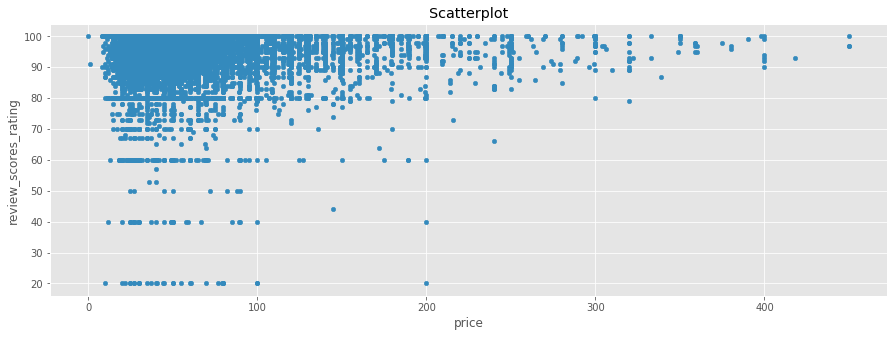

In [82]:
# Define correlation Price vs Raiting
features.plot.scatter(x='price', y='review_scores_rating')
plt.title("Scatterplot")
print('Pearson correlation coefficient:')
print(features['price'].corr(features['review_scores_rating']))


In [97]:
features.columns.tolist()

['id',
 'price',
 'bedrooms',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'review_scores_value',
 'review_scores_rating',
 'availability_365',
 'availability_90',
 'availability_60',
 'availability_30',
 'host_identity_verified',
 'instant_bookable',
 'host_is_superhost',
 'flexible',
 'moderate',
 'strict',
 'strict_14_with_grace_period',
 'super_strict_30',
 'super_strict_60',
 'Entire home/apt',
 'Hotel room',
 'Private room',
 'Shared room',
 'Charlottenburg-Wilm.',
 'Friedrichshain-Kreuzberg',
 'Lichtenberg',
 'Marzahn - Hellersdorf',
 'Mitte',
 'Neukölln',
 'Pankow',
 'Reinickendorf',
 'Spandau',
 'Steglitz - Zehlendorf',
 'Tempelhof - Schöneberg',
 'Treptow - Köpenick',
 ' toilet',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air purifier',
 'Amazon Echo',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Balcony',
 'Bath towel',
 'Bathroom essentials',
 'Bathtub',
 'Bathtub wit

0.10431163543140175


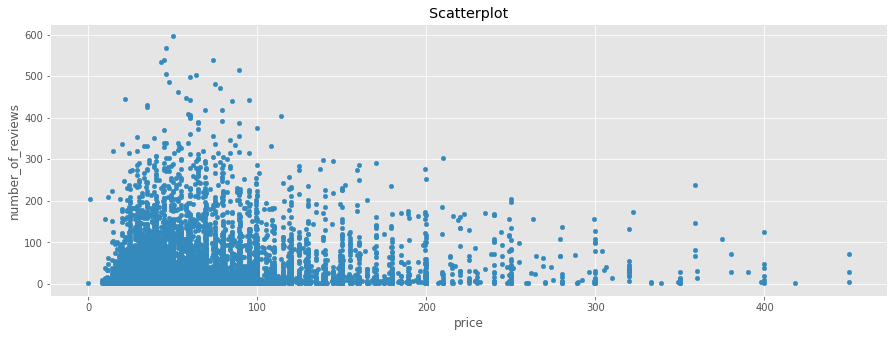

In [102]:
# Define correlation Price and Review numbers
features.plot.scatter(x='price', y='number_of_reviews')
plt.title("Scatterplot")
print(features['price'].corr(features['number_of_reviews']))

In [43]:
X = features.drop('price', axis=1)
y = features['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42
)

# Instantiate
lm_model = LinearRegression()

# Fit the model
lm_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
# Predict price
predicted_train_price = lm_model.predict(X_test)

In [50]:
predicted_train_price.max()

218.1759453781933

In [45]:
# Rsquared here for comparing test and preds from model
r2_test = r2_score(y_test, predicted_train_price)
r2_test

0.5018927970550926

Text(0.5, 0, 'Actual Prices')

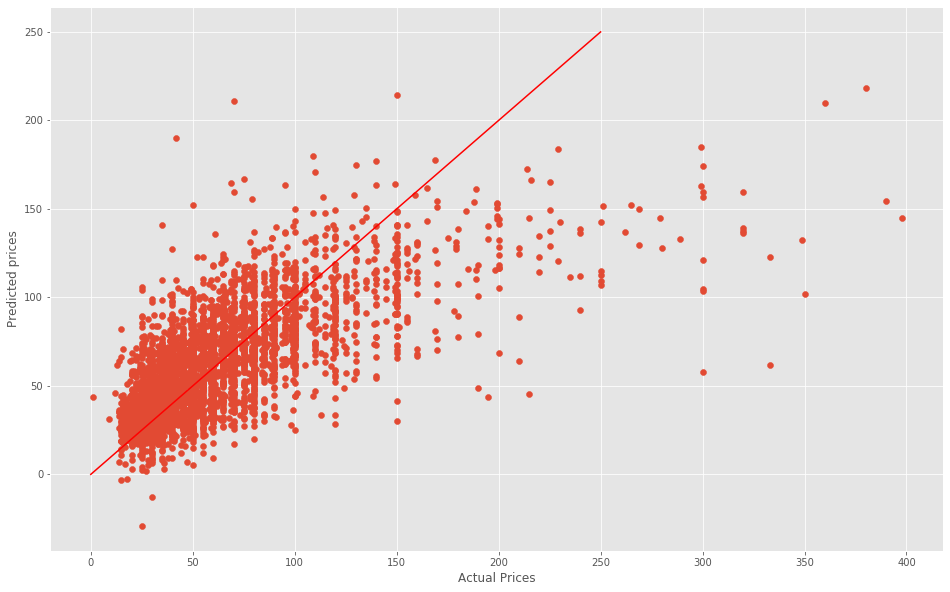

In [55]:
plt.figure(figsize=(16,10))
plt.scatter(y_test, predicted_train_price)
plt.plot([0, 250], [0, 250], 'r-' )
plt.ylabel('Predicted prices')
plt.xlabel('Actual Prices')

In [56]:
coefs = list(zip(lm_model.coef_, features))
coefs.sort(reverse=True)
coefs

[(75.03598516811394, 'Fireplace guards'),
 (69.10497939041332, 'Air conditioning'),
 (62.51051493303277, 'Iron'),
 (62.46315142261066, 'Lock on bedroom door'),
 (59.91826102561074, 'Smart TV'),
 (57.423763547573465, 'Breakfast table'),
 (35.609182541530195, 'DVD player'),
 (35.60918254153019, 'Stair gates'),
 (22.224164648166447, 'price'),
 (22.193576647715023, 'Shampoo'),
 (21.403103090715906, 'EV charger'),
 (20.585230951666915, 'super_strict_60'),
 (20.21080571833901, 'Pocket wifi'),
 (17.397814998092695, 'Mobile hoist'),
 (17.397814998092432, 'High chair'),
 (16.236544591527082, 'Pool with pool hoist'),
 (15.332828089311013, 'Elevator'),
 (15.278993424753594, 'Other pet(s)'),
 (13.764284471681481, 'Gas oven'),
 (13.692446317663352, 'En suite bathroom'),
 (13.42430824563687, 'Beach view'),
 (13.370980271329657, 'Flat path to guest entrance'),
 (11.353642372815859, 'Marzahn - Hellersdorf'),
 (10.966285427967103, 'Other'),
 (10.453770119589958, 'Charlottenburg-Wilm.'),
 (10.4428462237

In [103]:
neighborhoods = np.unique(listings['neighbourhood_group_cleansed'])
neighborhood_impact = [i for i in coefs if i[1] in neighborhoods]
neighborhood_impact.sort(reverse=True)

In [104]:
for index, val in neighborhood_impact:
    print(index, val)

11.353642372815859 Marzahn - Hellersdorf
10.453770119589958 Charlottenburg-Wilm.
8.256485009417421 Neukölln
6.808201327741172 Mitte
3.44780765953249 Steglitz - Zehlendorf
2.3702854606091486 Treptow - Köpenick
-0.6917521186114477 Friedrichshain-Kreuzberg
-2.9414992347236195 Tempelhof - Schöneberg
-4.573602368673519 Spandau
-9.259870761968507 Pankow
-11.761397917194778 Lichtenberg
-15.418340108087694 Reinickendorf


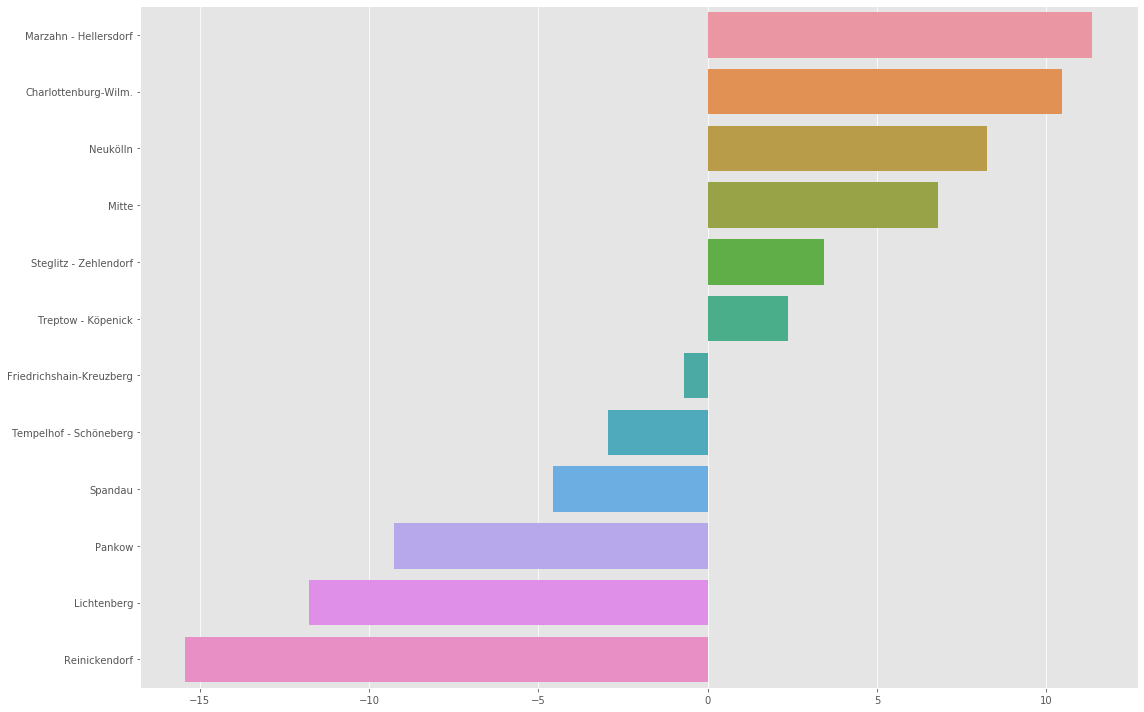

In [59]:
plt.figure(figsize=(16,10))
sns.barplot(x=[n[0] for n in neighborhood_impact], y=[n[1] for n in neighborhood_impact], orient='h')
plt.tight_layout()

So as we can see clearly that Marzahn-Hellersdorf, Charlottenburg-Wilmersdorf, Neukölln and finally Mitte, have the most positive effect on price. 

### What features have an impact on the price?


In [105]:
amenity_impact = [i for i in coefs if i[1] in unique_amenities]
amenity_impact.sort(reverse=True)
amenity_impact

[(75.03598516811394, 'Fireplace guards'),
 (69.10497939041332, 'Air conditioning'),
 (62.51051493303277, 'Iron'),
 (62.46315142261066, 'Lock on bedroom door'),
 (59.91826102561074, 'Smart TV'),
 (57.423763547573465, 'Breakfast table'),
 (35.609182541530195, 'DVD player'),
 (35.60918254153019, 'Stair gates'),
 (22.193576647715023, 'Shampoo'),
 (21.403103090715906, 'EV charger'),
 (20.21080571833901, 'Pocket wifi'),
 (17.397814998092695, 'Mobile hoist'),
 (17.397814998092432, 'High chair'),
 (16.236544591527082, 'Pool with pool hoist'),
 (15.332828089311013, 'Elevator'),
 (15.278993424753594, 'Other pet(s)'),
 (13.764284471681481, 'Gas oven'),
 (13.692446317663352, 'En suite bathroom'),
 (13.42430824563687, 'Beach view'),
 (13.370980271329657, 'Flat path to guest entrance'),
 (10.966285427967103, 'Other'),
 (10.342630877004988, 'Heated floors'),
 (10.203847531678083, 'Free street parking'),
 (9.057258376786633, 'Bed linens'),
 (9.057258376785883, 'Bath towel'),
 (8.85366602304968, 'Proje

In [106]:
cleaned = [x for x in amenity_impact if x[0] < -8 or x[0] >10]
cleaned

[(75.03598516811394, 'Fireplace guards'),
 (69.10497939041332, 'Air conditioning'),
 (62.51051493303277, 'Iron'),
 (62.46315142261066, 'Lock on bedroom door'),
 (59.91826102561074, 'Smart TV'),
 (57.423763547573465, 'Breakfast table'),
 (35.609182541530195, 'DVD player'),
 (35.60918254153019, 'Stair gates'),
 (22.193576647715023, 'Shampoo'),
 (21.403103090715906, 'EV charger'),
 (20.21080571833901, 'Pocket wifi'),
 (17.397814998092695, 'Mobile hoist'),
 (17.397814998092432, 'High chair'),
 (16.236544591527082, 'Pool with pool hoist'),
 (15.332828089311013, 'Elevator'),
 (15.278993424753594, 'Other pet(s)'),
 (13.764284471681481, 'Gas oven'),
 (13.692446317663352, 'En suite bathroom'),
 (13.42430824563687, 'Beach view'),
 (13.370980271329657, 'Flat path to guest entrance'),
 (10.966285427967103, 'Other'),
 (10.342630877004988, 'Heated floors'),
 (10.203847531678083, 'Free street parking'),
 (-8.089475921777924, 'Accessible-height bed'),
 (-8.320471322205368, 'Fixed grab bars for shower'

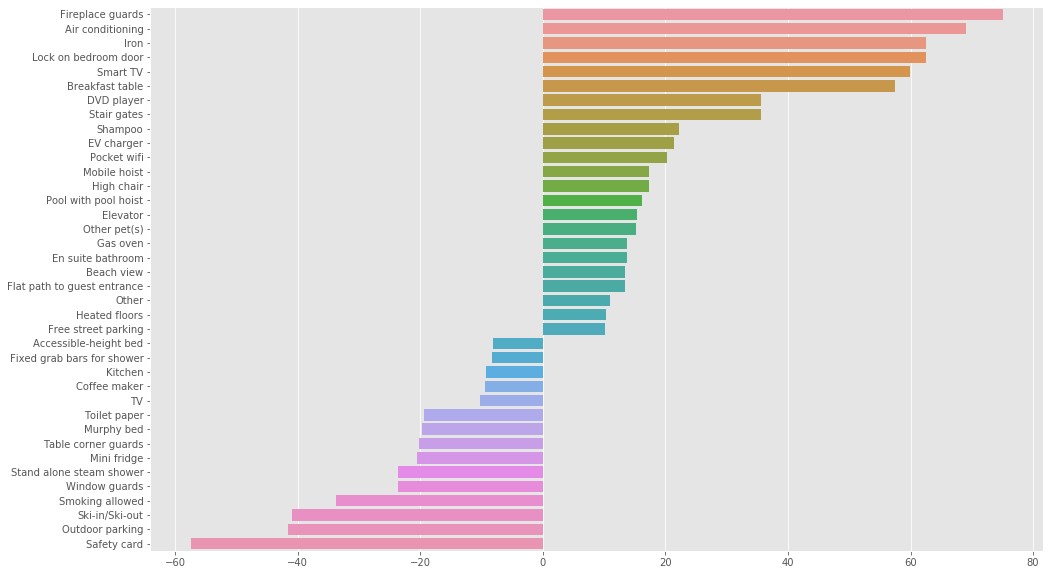

In [107]:
plt.figure(figsize=(16,10))
sns.barplot(x=[n[0] for n in cleaned], y=[n[1] for n in cleaned], orient='h')
plt.savefig('amenities.png')